"""
Perform clustering on Bankruptcy.csv and discuss your results. You can change the
number of clusters to different values, and also feel free to use a subset of the attributes in the
data.
You can refer to the following link for the descriptions of the attributes (X1~X18).
https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset

A novel dataset for bankruptcy prediction related to American public companies listed on the New York Stock Exchange and NASDAQ is provided. The dataset comprises accounting data from 8,262 distinct companies recorded during the period spanning from 1999 to 2018.

According to the Security Exchange Commission (SEC), a company in the American market is deemed bankrupt under two circumstances. Firstly, if the firm's management files for Chapter 11 of the Bankruptcy Code, indicating an intention to "reorganize" its business. In this case, the company's management continues to oversee day-to-day operations, but significant business decisions necessitate approval from a bankruptcy court. Secondly, if the firm's management files for Chapter 7 of the Bankruptcy Code, indicating a complete cessation of operations and the company going out of business entirely.

In this dataset, the fiscal year prior to the filing of bankruptcy under either Chapter 11 or Chapter 7 is labeled as "Bankruptcy" (1) for the subsequent year. Conversely, if the company does not experience these bankruptcy events, it is considered to be operating normally (0). The dataset is complete, without any missing values, synthetic entries, or imputed added values.

The resulting dataset comprises a total of 78,682 observations of firm-year combinations. To facilitate model training and evaluation, the dataset is divided into three subsets based on time periods. The training set consists of data from 1999 to 2011, the validation set comprises data from 2012 to 2014, and the test set encompasses the years 2015 to 2018. The test set serves as a means to assess the predictive capability of models in real-world scenarios involving unseen cases.

Columns and description
=======================
company_name : Company Name


Variable Name(X1 - X18)	Description

X1	Current assets - All the assets of a company that are expected to be sold or used as a result of standard
business operations over the next year

X2	Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products

X3	Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of
intangible assets over time.

X4	EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's
overall financial performance, serving as an alternative to net income.

X5	Inventory - The accounting of items and raw materials that a company either uses in production or sells.

X6	Net Income - The overall profitability of a company after all expenses and costs have been deducted from
total revenue.

X7	Total Receivables - The balance of money due to a firm for goods or services delivered or used but not
yet paid for by customers.

X8	Market value - The price of an asset in a marketplace. In this dataset, it refers to the market
capitalization since companies are publicly traded in the stock market.

X9	Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.

X10	Total assets - All the assets, or items of value, a business owns.

X11	Total Long-term debt - A company's loans and other liabilities that will not become due within one year
of the balance sheet date.

X12	EBIT - Earnings before interest and taxes.

X13	Gross Profit - The profit a business makes after subtracting all the costs that are related to
manufacturing and selling its products or services.

X14	Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds
payable at the end of the year, salaries, and commissions remaining.

X15	Retained Earnings - The amount of profit a company has left over after paying all its direct costs,
indirect costs, income taxes, and its dividends to shareholders.

X16	Total Revenue - The amount of income that a business has made from all sales before subtracting expenses.
It may include interest and dividends from investments.

X17	Total Liabilities - The combined debts and obligations that the company owes to outside parties.

X18	Total Operating Expenses - The expenses a business incurs through its normal business operations.


Approach
===================
1. Read the data into a dataframe
2. Optionally fix/massage the data if needed (Here we'll not do it) as the data is pretty clean. 
We'll only remove some columns which are random and doesn't play any role in clustering. This will help in
meaningful clustering.
3. Convert categorical fields into numerical field for clustering
4. Normalize the data for each column so that scale of difference for each column is between 0 and 1. This way 
each field will get equivalent influence in clustering.
5. Optionally add weight to specific column, if their possible values are too far from each other and they can 
have handful possible values.
6. Run KMeans analyis on the weighted or unweighted dataset
---- Finding optimum K value
7. Run step 6 for different values of K and find the best k using Elbow method.
8. Run step 6 for different values of K and find the best k using Silhouette method.

"""

In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
# 1. Read the data into a dataframe
# Read the input file into a dataframe
data = pd.read_csv('Bankruptcy.csv')
# Examine the data
data.head(10)

,company_name,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_6,6838.000,18138.000,995.000,1303.000,594.000,-471.000,738.000,2597.5755,22170.000,25088.000,9253.000,308.000,4032.000,8780.000,-8362.000,22170.000,29033.000,20867.000
1,C_14,502.627,566.984,32.812,15.625,137.076,-316.121,256.910,103.1365,711.359,767.024,302.916,-17.187,144.375,302.518,-127.622,711.359,671.739,695.734
2,C_20,192.518,1064.284,18.792,24.846,13.070,2.513,89.897,167.2437,1099.540,246.872,0.000,6.054,35.256,86.074,139.197,1099.540,95.560,1074.694
3,C_38,1.677,3.088,1.339,-1.644,0.000,-3.613,0.671,26.6986,3.572,30.881,2.144,-2.983,0.484,4.329,-1.411,3.572,11.572,5.216
4,C_53,70.018,349.167,24.162,37.433,19.004,-109.681,39.979,13.3995,423.920,230.324,175.184,13.271,74.753,54.886,-119.894,423.920,272.259,386.487
5,C_131,7.436,15.279,1.340,-5.654,3.267,-9.769,2.348,1.3248,21.799,14.165,4.892,-6.994,6.520,11.041,-63.158,21.799,15.933,27.453
6,C_139,10.981,2.813,0.126,-7.022,2.329,-7.143,0.375,25.6470,5.328,12.249,0.000,-7.148,2.515,1.587,-52.772,5.328,1.587,12.350
7,C_154,207.229,205.114,9.006,-50.556,118.205,-0.341,16.566,50.4520,355.958,357.354,25.767,-59.562,150.844,140.459,-66.668,355.958,264.469,406.514
8,C_186,109.314,21.934,0.448,-118.650,4.325,-118.312,4.341,76.7372,18.023,119.206,223.087,-119.098,-3.911,31.616,-536.219,18.023,257.503,136.673
9,C_195,21.877,70.493,6.036,10.711,9.330,-6.959,10.981,1.2555,88.408,52.367,0.005,4.675,17.915,87.771,-50.366,88.408,88.308,77.697


In [3]:
# 2. Optionally fix/massage the data if needed (Here we'll not do it) as the data is pretty clean. 
# We'll only remove some columns which are random and doesn't play any role in clustering. This will help in
# meaningful clustering.

# Setup data for clustering
# The company_name doesn't have any significance here in grouping, so dropping id column.
df = data.drop('company_name',axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,6838.000,18138.000,995.000,1303.000,594.000,-471.000,738.000,2597.5755,22170.000,25088.000,9253.000,308.000,4032.000,8780.000,-8362.000,22170.000,29033.000,20867.000
1,502.627,566.984,32.812,15.625,137.076,-316.121,256.910,103.1365,711.359,767.024,302.916,-17.187,144.375,302.518,-127.622,711.359,671.739,695.734
2,192.518,1064.284,18.792,24.846,13.070,2.513,89.897,167.2437,1099.540,246.872,0.000,6.054,35.256,86.074,139.197,1099.540,95.560,1074.694
3,1.677,3.088,1.339,-1.644,0.000,-3.613,0.671,26.6986,3.572,30.881,2.144,-2.983,0.484,4.329,-1.411,3.572,11.572,5.216
4,70.018,349.167,24.162,37.433,19.004,-109.681,39.979,13.3995,423.920,230.324,175.184,13.271,74.753,54.886,-119.894,423.920,272.259,386.487
5,7.436,15.279,1.340,-5.654,3.267,-9.769,2.348,1.3248,21.799,14.165,4.892,-6.994,6.520,11.041,-63.158,21.799,15.933,27.453
6,10.981,2.813,0.126,-7.022,2.329,-7.143,0.375,25.6470,5.328,12.249,0.000,-7.148,2.515,1.587,-52.772,5.328,1.587,12.350
7,207.229,205.114,9.006,-50.556,118.205,-0.341,16.566,50.4520,355.958,357.354,25.767,-59.562,150.844,140.459,-66.668,355.958,264.469,406.514
8,109.314,21.934,0.448,-118.650,4.325,-118.312,4.341,76.7372,18.023,119.206,223.087,-119.098,-3.911,31.616,-536.219,18.023,257.503,136.673
9,21.877,70.493,6.036,10.711,9.330,-6.959,10.981,1.2555,88.408,52.367,0.005,4.675,17.915,87.771,-50.366,88.408,88.308,77.697


In [4]:
# 3. Convert categorical fields into numerical field for clustering
# Analysis of data before clustering
# However in this dataset there is no categorical attribute. So we can safely skip this step.

print("No categorical variable to be converted to numerical")

No categorical variable to be converted to numerical


In [5]:
# 4. Normalize the data for each column so that scale of difference for each column is between 0 and 1. 
# This way each field will get equivalent influence in clustering.
# For example income can vary a lot if we just go by numbers, so represent them with a value between 0 and 1
# With max value being considered as 1 and min value being 0. After that every value is normalized to -
#                      current_value
#   new_value = -----------------------------
#                  (max value - min value)
# This is known as MinMax Scaler
# 
# We'll apply this on age, inclome and children

sc = MinMaxScaler()
for col in ('X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18'):
    df[[col]] = sc.fit_transform(df[[col]])
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,0.743665,0.951976,0.327734,0.557221,0.212294,0.678027,0.117722,0.104338,0.997391,0.325839,4.286575e-01,0.523631,0.827065,0.210572,0.713942,0.997391,0.452987,1.000000
1,0.054663,0.029758,0.010808,0.428780,0.048991,0.694523,0.040981,0.004143,0.032003,0.009962,1.403298e-02,0.489313,0.433674,0.007250,0.883220,0.032003,0.010477,0.033325
2,0.020937,0.055859,0.006190,0.429700,0.004671,0.728460,0.014340,0.006718,0.049466,0.003206,0.000000e+00,0.491766,0.422632,0.002059,0.888706,0.049466,0.001487,0.051486
3,0.000182,0.000162,0.000441,0.427057,0.000000,0.727808,0.000107,0.001072,0.000161,0.000401,9.932364e-05,0.490812,0.419113,0.000098,0.885815,0.000161,0.000177,0.000233
4,0.007615,0.018326,0.007958,0.430956,0.006792,0.716511,0.006377,0.000538,0.019071,0.002991,8.115631e-03,0.492527,0.426629,0.001311,0.883379,0.019071,0.004244,0.018504
5,0.000809,0.000802,0.000441,0.426657,0.001168,0.727152,0.000375,0.000053,0.000981,0.000184,2.266284e-04,0.490389,0.419724,0.000259,0.884546,0.000981,0.000245,0.001298
6,0.001194,0.000148,0.000042,0.426521,0.000832,0.727432,0.000060,0.001030,0.000240,0.000159,0.000000e+00,0.490373,0.419319,0.000033,0.884759,0.000240,0.000021,0.000575
7,0.022537,0.010765,0.002966,0.422177,0.042246,0.728156,0.002643,0.002026,0.016014,0.004641,1.193690e-03,0.484841,0.434328,0.003363,0.884474,0.016014,0.004123,0.019464
8,0.011888,0.001151,0.000148,0.415384,0.001546,0.715591,0.000692,0.003082,0.000811,0.001548,1.033480e-02,0.478558,0.418669,0.000753,0.874821,0.000811,0.004014,0.006532
9,0.002379,0.003700,0.001988,0.428290,0.003335,0.727451,0.001752,0.000050,0.003977,0.000680,2.316316e-07,0.491620,0.420877,0.002100,0.884809,0.003977,0.001374,0.003706


In [6]:
# 5. Optionally add weight to specific column, if their possible values are too far from each other 
# and they can have handful possible values.
# 
# Analysis
# ================
# In this dataset X1 to X18 all are numerical. So they can easily fit between 0 to 1 using MinMaxScaler.
# No additional weight adjustment is needed at this point.

print("No weight adjustment has been done in this dataset as all columns were originally numerical and they were \
scaled to fit between 0 and 1")

No weight adjustment has been done in this dataset as all columns were originally numerical and they were scaled to fit between 0 and 1


In [7]:
#Run KMeans analyis on the weighted and unweighted dataset 
# 
# a) k=3
# a.1: KMeans on unweighted dataset



# a.1: KMeans on unweighted dataset
# random_state 30 ensures random numbers are consistent across multiple runs
km_unweighted = KMeans(n_clusters=3, random_state=30).fit(df)

# Add the cluster column in the dataframe

df['cluster'] = km_unweighted.labels_
df.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,cluster
0,0.743665,0.951976,0.327734,0.557221,0.212294,0.678027,0.117722,0.104338,0.997391,0.325839,4.286575e-01,0.523631,0.827065,0.210572,0.713942,0.997391,0.452987,1.000000,1
1,0.054663,0.029758,0.010808,0.428780,0.048991,0.694523,0.040981,0.004143,0.032003,0.009962,1.403298e-02,0.489313,0.433674,0.007250,0.883220,0.032003,0.010477,0.033325,0
2,0.020937,0.055859,0.006190,0.429700,0.004671,0.728460,0.014340,0.006718,0.049466,0.003206,0.000000e+00,0.491766,0.422632,0.002059,0.888706,0.049466,0.001487,0.051486,0
3,0.000182,0.000162,0.000441,0.427057,0.000000,0.727808,0.000107,0.001072,0.000161,0.000401,9.932364e-05,0.490812,0.419113,0.000098,0.885815,0.000161,0.000177,0.000233,0
4,0.007615,0.018326,0.007958,0.430956,0.006792,0.716511,0.006377,0.000538,0.019071,0.002991,8.115631e-03,0.492527,0.426629,0.001311,0.883379,0.019071,0.004244,0.018504,0
5,0.000809,0.000802,0.000441,0.426657,0.001168,0.727152,0.000375,0.000053,0.000981,0.000184,2.266284e-04,0.490389,0.419724,0.000259,0.884546,0.000981,0.000245,0.001298,0
6,0.001194,0.000148,0.000042,0.426521,0.000832,0.727432,0.000060,0.001030,0.000240,0.000159,0.000000e+00,0.490373,0.419319,0.000033,0.884759,0.000240,0.000021,0.000575,0
7,0.022537,0.010765,0.002966,0.422177,0.042246,0.728156,0.002643,0.002026,0.016014,0.004641,1.193690e-03,0.484841,0.434328,0.003363,0.884474,0.016014,0.004123,0.019464,0
8,0.011888,0.001151,0.000148,0.415384,0.001546,0.715591,0.000692,0.003082,0.000811,0.001548,1.033480e-02,0.478558,0.418669,0.000753,0.874821,0.000811,0.004014,0.006532,0
9,0.002379,0.003700,0.001988,0.428290,0.003335,0.727451,0.001752,0.000050,0.003977,0.000680,2.316316e-07,0.491620,0.420877,0.002100,0.884809,0.003977,0.001374,0.003706,0


In [8]:
# Print the cluster size and cluster mean for unweighted dataset having 3 clusters
print("Cluster wise total with k=3") 
print(df.groupby('cluster').size())
df.groupby('cluster').mean()

Cluster wise total with k=3
cluster
0    576
1      6
2     27
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
cluster,,,,,,,,,,,,,,,,,,
0,0.015948,0.017009,0.013669,0.426543,0.013740,0.717863,0.007185,0.005634,0.018287,0.006748,0.009607,0.486030,0.427404,0.005193,0.879366,0.018287,0.007589,0.019789
1,0.574678,0.742429,0.426877,0.625730,0.409280,0.472095,0.315521,0.242886,0.801339,0.413986,0.416064,0.564331,0.790097,0.274269,0.787418,0.801339,0.479117,0.758250
2,0.266998,0.302015,0.174089,0.511460,0.197413,0.619976,0.120702,0.088629,0.355969,0.127800,0.209991,0.524453,0.637452,0.090333,0.806407,0.355969,0.157920,0.338712


In [9]:
# Remove the cluster column as we prepare for running KMeans with k=4
df.drop('cluster', axis=1, inplace=True)
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,0.743665,0.951976,0.327734,0.557221,0.212294,0.678027,0.117722,0.104338,0.997391,0.325839,4.286575e-01,0.523631,0.827065,0.210572,0.713942,0.997391,0.452987,1.000000
1,0.054663,0.029758,0.010808,0.428780,0.048991,0.694523,0.040981,0.004143,0.032003,0.009962,1.403298e-02,0.489313,0.433674,0.007250,0.883220,0.032003,0.010477,0.033325
2,0.020937,0.055859,0.006190,0.429700,0.004671,0.728460,0.014340,0.006718,0.049466,0.003206,0.000000e+00,0.491766,0.422632,0.002059,0.888706,0.049466,0.001487,0.051486
3,0.000182,0.000162,0.000441,0.427057,0.000000,0.727808,0.000107,0.001072,0.000161,0.000401,9.932364e-05,0.490812,0.419113,0.000098,0.885815,0.000161,0.000177,0.000233
4,0.007615,0.018326,0.007958,0.430956,0.006792,0.716511,0.006377,0.000538,0.019071,0.002991,8.115631e-03,0.492527,0.426629,0.001311,0.883379,0.019071,0.004244,0.018504
5,0.000809,0.000802,0.000441,0.426657,0.001168,0.727152,0.000375,0.000053,0.000981,0.000184,2.266284e-04,0.490389,0.419724,0.000259,0.884546,0.000981,0.000245,0.001298
6,0.001194,0.000148,0.000042,0.426521,0.000832,0.727432,0.000060,0.001030,0.000240,0.000159,0.000000e+00,0.490373,0.419319,0.000033,0.884759,0.000240,0.000021,0.000575
7,0.022537,0.010765,0.002966,0.422177,0.042246,0.728156,0.002643,0.002026,0.016014,0.004641,1.193690e-03,0.484841,0.434328,0.003363,0.884474,0.016014,0.004123,0.019464
8,0.011888,0.001151,0.000148,0.415384,0.001546,0.715591,0.000692,0.003082,0.000811,0.001548,1.033480e-02,0.478558,0.418669,0.000753,0.874821,0.000811,0.004014,0.006532
9,0.002379,0.003700,0.001988,0.428290,0.003335,0.727451,0.001752,0.000050,0.003977,0.000680,2.316316e-07,0.491620,0.420877,0.002100,0.884809,0.003977,0.001374,0.003706


In [10]:
#Run KMeans analyis on the weighted and unweighted dataset 
# 
# a) k=4
# a.1: KMeans on unweighted dataset



# a.1: KMeans on unweighted dataset
# random_state 30 ensures random numbers are consistent across multiple runs
km_unweighted = KMeans(n_clusters=4, random_state=30).fit(df)

# Add the cluster column in the dataframe

df['cluster'] = km_unweighted.labels_
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,cluster
0,0.743665,0.951976,0.327734,0.557221,0.212294,0.678027,0.117722,0.104338,0.997391,0.325839,4.286575e-01,0.523631,0.827065,0.210572,0.713942,0.997391,0.452987,1.000000,1
1,0.054663,0.029758,0.010808,0.428780,0.048991,0.694523,0.040981,0.004143,0.032003,0.009962,1.403298e-02,0.489313,0.433674,0.007250,0.883220,0.032003,0.010477,0.033325,0
2,0.020937,0.055859,0.006190,0.429700,0.004671,0.728460,0.014340,0.006718,0.049466,0.003206,0.000000e+00,0.491766,0.422632,0.002059,0.888706,0.049466,0.001487,0.051486,0
3,0.000182,0.000162,0.000441,0.427057,0.000000,0.727808,0.000107,0.001072,0.000161,0.000401,9.932364e-05,0.490812,0.419113,0.000098,0.885815,0.000161,0.000177,0.000233,0
4,0.007615,0.018326,0.007958,0.430956,0.006792,0.716511,0.006377,0.000538,0.019071,0.002991,8.115631e-03,0.492527,0.426629,0.001311,0.883379,0.019071,0.004244,0.018504,0
5,0.000809,0.000802,0.000441,0.426657,0.001168,0.727152,0.000375,0.000053,0.000981,0.000184,2.266284e-04,0.490389,0.419724,0.000259,0.884546,0.000981,0.000245,0.001298,0
6,0.001194,0.000148,0.000042,0.426521,0.000832,0.727432,0.000060,0.001030,0.000240,0.000159,0.000000e+00,0.490373,0.419319,0.000033,0.884759,0.000240,0.000021,0.000575,0
7,0.022537,0.010765,0.002966,0.422177,0.042246,0.728156,0.002643,0.002026,0.016014,0.004641,1.193690e-03,0.484841,0.434328,0.003363,0.884474,0.016014,0.004123,0.019464,0
8,0.011888,0.001151,0.000148,0.415384,0.001546,0.715591,0.000692,0.003082,0.000811,0.001548,1.033480e-02,0.478558,0.418669,0.000753,0.874821,0.000811,0.004014,0.006532,0
9,0.002379,0.003700,0.001988,0.428290,0.003335,0.727451,0.001752,0.000050,0.003977,0.000680,2.316316e-07,0.491620,0.420877,0.002100,0.884809,0.003977,0.001374,0.003706,0


In [11]:
# Print the cluster size and cluster mean for unweighted dataset having 4 clusters
print("Cluster wise total with k=4") 
print(df.groupby('cluster').size())
df.groupby('cluster').mean()

Cluster wise total with k=4
cluster
0    577
1      8
2     23
3      1
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
cluster,,,,,,,,,,,,,,,,,,
0,0.016446,0.017159,0.013811,0.426524,0.014012,0.717663,0.007303,0.005994,0.018449,0.006995,0.010082,0.485964,0.427479,0.005315,0.879325,0.018449,0.007847,0.019970
1,0.375837,0.527952,0.373691,0.675625,0.182335,0.621799,0.165520,0.255768,0.611559,0.320915,0.676983,0.634148,0.776739,0.103195,0.787940,0.611559,0.392851,0.532122
2,0.275962,0.334938,0.138110,0.467104,0.259059,0.608481,0.119680,0.047589,0.376565,0.096427,0.107252,0.489063,0.620303,0.094940,0.802505,0.376565,0.123455,0.381958
3,1.000000,0.578282,1.000000,1.000000,0.197999,0.000000,1.000000,0.496394,0.753959,1.000000,0.000000,0.776590,1.000000,1.000000,0.880520,0.753959,1.000000,0.528003


In [12]:
# Remove the cluster column as we prepare for running KMeans with k=2
df.drop('cluster', axis=1, inplace=True)
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,0.743665,0.951976,0.327734,0.557221,0.212294,0.678027,0.117722,0.104338,0.997391,0.325839,4.286575e-01,0.523631,0.827065,0.210572,0.713942,0.997391,0.452987,1.000000
1,0.054663,0.029758,0.010808,0.428780,0.048991,0.694523,0.040981,0.004143,0.032003,0.009962,1.403298e-02,0.489313,0.433674,0.007250,0.883220,0.032003,0.010477,0.033325
2,0.020937,0.055859,0.006190,0.429700,0.004671,0.728460,0.014340,0.006718,0.049466,0.003206,0.000000e+00,0.491766,0.422632,0.002059,0.888706,0.049466,0.001487,0.051486
3,0.000182,0.000162,0.000441,0.427057,0.000000,0.727808,0.000107,0.001072,0.000161,0.000401,9.932364e-05,0.490812,0.419113,0.000098,0.885815,0.000161,0.000177,0.000233
4,0.007615,0.018326,0.007958,0.430956,0.006792,0.716511,0.006377,0.000538,0.019071,0.002991,8.115631e-03,0.492527,0.426629,0.001311,0.883379,0.019071,0.004244,0.018504
5,0.000809,0.000802,0.000441,0.426657,0.001168,0.727152,0.000375,0.000053,0.000981,0.000184,2.266284e-04,0.490389,0.419724,0.000259,0.884546,0.000981,0.000245,0.001298
6,0.001194,0.000148,0.000042,0.426521,0.000832,0.727432,0.000060,0.001030,0.000240,0.000159,0.000000e+00,0.490373,0.419319,0.000033,0.884759,0.000240,0.000021,0.000575
7,0.022537,0.010765,0.002966,0.422177,0.042246,0.728156,0.002643,0.002026,0.016014,0.004641,1.193690e-03,0.484841,0.434328,0.003363,0.884474,0.016014,0.004123,0.019464
8,0.011888,0.001151,0.000148,0.415384,0.001546,0.715591,0.000692,0.003082,0.000811,0.001548,1.033480e-02,0.478558,0.418669,0.000753,0.874821,0.000811,0.004014,0.006532
9,0.002379,0.003700,0.001988,0.428290,0.003335,0.727451,0.001752,0.000050,0.003977,0.000680,2.316316e-07,0.491620,0.420877,0.002100,0.884809,0.003977,0.001374,0.003706


In [13]:
#Run KMeans analyis on the weighted and unweighted dataset 
# 
# a) k=2
# a.1: KMeans on unweighted dataset



# a.1: KMeans on unweighted dataset
# random_state 30 ensures random numbers are consistent across multiple runs
km_unweighted = KMeans(n_clusters=2, random_state=30).fit(df)

# Add the cluster column in the dataframe

df['cluster'] = km_unweighted.labels_
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,cluster
0,0.743665,0.951976,0.327734,0.557221,0.212294,0.678027,0.117722,0.104338,0.997391,0.325839,4.286575e-01,0.523631,0.827065,0.210572,0.713942,0.997391,0.452987,1.000000,1
1,0.054663,0.029758,0.010808,0.428780,0.048991,0.694523,0.040981,0.004143,0.032003,0.009962,1.403298e-02,0.489313,0.433674,0.007250,0.883220,0.032003,0.010477,0.033325,0
2,0.020937,0.055859,0.006190,0.429700,0.004671,0.728460,0.014340,0.006718,0.049466,0.003206,0.000000e+00,0.491766,0.422632,0.002059,0.888706,0.049466,0.001487,0.051486,0
3,0.000182,0.000162,0.000441,0.427057,0.000000,0.727808,0.000107,0.001072,0.000161,0.000401,9.932364e-05,0.490812,0.419113,0.000098,0.885815,0.000161,0.000177,0.000233,0
4,0.007615,0.018326,0.007958,0.430956,0.006792,0.716511,0.006377,0.000538,0.019071,0.002991,8.115631e-03,0.492527,0.426629,0.001311,0.883379,0.019071,0.004244,0.018504,0
5,0.000809,0.000802,0.000441,0.426657,0.001168,0.727152,0.000375,0.000053,0.000981,0.000184,2.266284e-04,0.490389,0.419724,0.000259,0.884546,0.000981,0.000245,0.001298,0
6,0.001194,0.000148,0.000042,0.426521,0.000832,0.727432,0.000060,0.001030,0.000240,0.000159,0.000000e+00,0.490373,0.419319,0.000033,0.884759,0.000240,0.000021,0.000575,0
7,0.022537,0.010765,0.002966,0.422177,0.042246,0.728156,0.002643,0.002026,0.016014,0.004641,1.193690e-03,0.484841,0.434328,0.003363,0.884474,0.016014,0.004123,0.019464,0
8,0.011888,0.001151,0.000148,0.415384,0.001546,0.715591,0.000692,0.003082,0.000811,0.001548,1.033480e-02,0.478558,0.418669,0.000753,0.874821,0.000811,0.004014,0.006532,0
9,0.002379,0.003700,0.001988,0.428290,0.003335,0.727451,0.001752,0.000050,0.003977,0.000680,2.316316e-07,0.491620,0.420877,0.002100,0.884809,0.003977,0.001374,0.003706,0


In [14]:
# Print the cluster size and cluster mean for unweighted dataset having 2 clusters
print("Cluster wise total with k=2") 
print(df.groupby('cluster').size())
df.groupby('cluster').mean()

Cluster wise total with k=2
cluster
0    580
1     29
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
cluster,,,,,,,,,,,,,,,,,,
0,0.017414,0.017905,0.014474,0.426900,0.014287,0.717703,0.007819,0.006856,0.019513,0.007616,0.010613,0.486149,0.428435,0.005492,0.879262,0.019513,0.008343,0.020924
1,0.335979,0.414527,0.232434,0.539682,0.255638,0.579082,0.163993,0.107548,0.470163,0.186349,0.260147,0.535612,0.677383,0.134160,0.794493,0.470163,0.230038,0.446800


Finding the best K value using Elbow Method
==========================================
Reference - https://www.youtube.com/watch?v=wW1tgWtkj4I
Finding the right value of k is tricky. The quality of a cluster in a given clustering can be formulated by

WCSS [Within Cluster Sum of Squares]

= Sum of each cluster(Cluster level sum of squares from each point to its centroid)

Lesser the value of WCSS, the better is the clustering.

Algorithm

For each k we need to calculate WCSS
For k's value of 1 to n it will take the shape of an elbow, first the WCSS value will reduce drastically with increased k, and then at certain value of k the improvement will be slowed down. The plot will look like this

    * WCSS = High
    
    
      * 
     
     
        *
      
           *
         
              *
        
                  * 
                      * WCSS = Optimum 
                           *  *
                                  *   *   * WCSS = Low
   ---------------------------------------------
   k=1                                   k=12

As we increase the number of clusters(k)







In [15]:
# Remove the cluster column as we prepare for running KMeans with k=1 to 12
df.drop('cluster', axis=1, inplace=True)


WCSS = []
K = range(1, 15) 
for k in K:
    km = KMeans(n_clusters=k, random_state=30)
    km.fit(df)
    WCSS.append(km.inertia_)

print(WCSS)

[66.20704656966579, 31.681020735379796, 25.35108507284068, 21.787702733758938, 18.34432051869855, 15.726793110722157, 13.451621501956591, 12.085014571345138, 11.087230309993856, 9.704253969182304, 8.714535338372446, 8.245492898595822, 7.563058566172213, 7.0172626866436945]


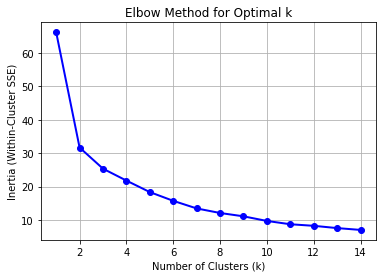

In [16]:
# --- Step 3: Plot the Elbow Curve ---
plt.figure(figsize=(6, 4))
plt.plot(K, WCSS, 'bo-', linewidth=2) #b= blue, o = circle, - = connector between points
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.grid(True)
plt.show()




FInal Review and Analysis Using Elbow Method
========================================
In this dataset we ran Kmeans with k=1 to 12 and as we can see from the elbow plot, starting at k=2 the clustering has become optimum. if k>2 the improvement/intertia is not compareable with that of k=2 from k=1.

Determine Best K Using Silhouette Score
===================================
Silouette score is based on Silouette coeeficient of each point and avergae of all silouette coefficients.


For each data point 𝑖:
    a(i) = average distance between i and all other points in the same cluster (cohesion)
    b(i) = average distance between i and points in the nearest other cluster (separation)

    Then the silhouette coefficient s(i) for that point is:

             𝑏(𝑖) − 𝑎(𝑖)
    s(i) = ----------------
             max(𝑎(𝑖),𝑏(𝑖))



s(i) ranges from -1 to +1


**Important:: 

Since this compares the fitment optimization of a point in its own cluster and compares with the other points in different cluster, k should start with a value of 2 and not 1

Interpretetion
============

+1 → well-clustered (point far from other clusters)

0 → on the border between clusters

-1 → misclassified (closer to another cluster than its own)


The Silhouette Score for the entire dataset is the average of all s(i)

    S = Average(s(i))


k = 2, Silhouette Score = 0.871
k = 3, Silhouette Score = 0.849
k = 4, Silhouette Score = 0.847
k = 5, Silhouette Score = 0.843
k = 6, Silhouette Score = 0.714
k = 7, Silhouette Score = 0.715
k = 8, Silhouette Score = 0.715
k = 9, Silhouette Score = 0.712
k = 10, Silhouette Score = 0.707


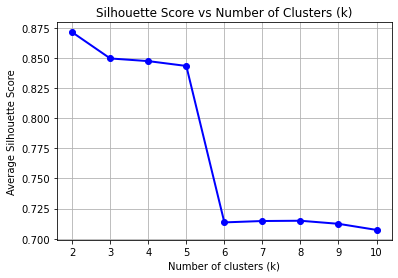

In [17]:
df.head(10)
#df.drop('cluster', axis=1, inplace=True)

# Initialize an empty Silhoette score slice for various K values
sil_scores = []
K = range(2, 11)  # silhouette needs at least 2 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    sil = silhouette_score(df, labels) 
    sil_scores.append(sil)
    print(f"k = {k}, Silhouette Score = {sil:.3f}")

# --- Step 3: Plot silhouette scores ---
plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, 'bo-', linewidth=2)
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()

Final Review and Analysis Using Silouette Score
=========================================
In this dataset we ran Kmeans with k=2 to 12 and as we can see from the Silhouette Score is maximum @k=2, it can be concluded that the most efficient clustering will happen in KMeans using k=2